In [1]:
from river.metrics import RMSE
from src.plot import Plots
from src.data import get_synth_datasets
from src.data import get_real_datasets
from src.models import get_models
from utils import evaluate

In [ ]:
INSTANCES = 100_000
real_datasets = get_real_datasets()
models = get_models()
logs = []
for d_name, dataset_generator in real_datasets.items():
    for model_name, model in models.items():
        eval_model = {
            model_name: model.clone()
        }
        eval_dataset_stream = {
            d_name: dataset_generator().take(INSTANCES)
        }
        logs.append(evaluate(
            eval_dataset_stream,
            eval_model,
            RMSE(),
            print_every=INSTANCES/100
        ))
plot_gen = Plots()
plot_gen.plot_all(logs)

Evaluating HTR on friedman_drift_abrupt
Final RMSE: 2.516385: 2.516385
--------------------------------------------------
Evaluating HTR on friedman_drift_abrupt-2
Final RMSE: 2.478382: 2.478382
--------------------------------------------------
Evaluating HTR on friedman_drift_abrupt-3
Final RMSE: 2.476285: 2.476285
--------------------------------------------------
Evaluating HTR on friedman_drift_abrupt-4
Final RMSE: 2.514035: 2.514035
--------------------------------------------------


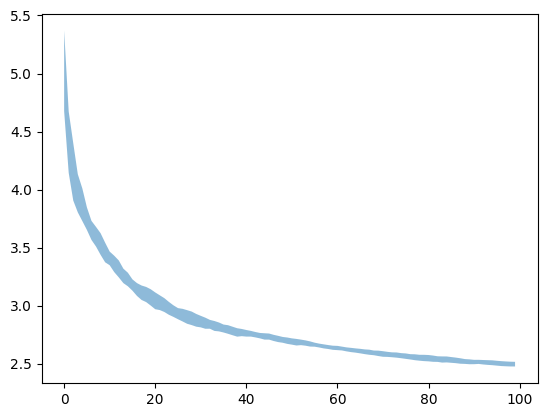

In [3]:
INSTANCES = 10_000
synth_datasets = get_synth_datasets()
models = get_models()
logs = []
for d_name, dataset_generator in synth_datasets.items():
    for model_name, model in models.items():
        eval_model = {
            model_name: model.clone()
        }
        eval_dataset_stream = {
            d_name: dataset_generator().take(INSTANCES)
        }
        logs.append(evaluate(
            eval_dataset_stream,
            eval_model,
            RMSE(),
            print_every=INSTANCES/100
        ))
plot_gen = Plots()
plot_gen.plot_band(logs)